
<img src="fooboar/Fuboar_rainbow.png" alt="Fooboar" width="200"/>

# Fooboar's Geburtstagsparty!



Es ist soweit! **Fooboar's 13. Geburtstag** steht an und es müssen noch einige Vorbereitungen getroffen werden. Fooboar will eine große Geburtstagsfeier veranstalten und kann sich nicht um alles alleine kümmern.
**Löst die folgenden Aufgaben und helft Fooboar einen tollen Geburtstag zu verbringen!!**

## AUFGABE 1 - Den Ort der Party bestimmen

Fooboar sucht als Erstes mit seinen Freunden einen Ort, an dem der Geburtstag gefeiert werden kann. Finde anhand des Chatverlaufs heraus, **wo der Geburtstag stattfinden soll**.

Fooboar hat sich bereits mit seinen Freunden über den Ort ausgetauscht und der unten stehende Chatverlauf soll mittels *Text Mining* analysiert werden. Mit Text Mining könnt ihr aus großen oder unstrukturierten Texten systematisch Informationen extrahieren - wie z. B. den Ort von Fooboar's Party. 

Hierzu braucht ihr "spaCy". SpaCy ist eine Bibliothek in Python, die euch bei der Aufgabe unterstützt.

### Bibliothek? Müssen wir jetzt erst Bücher wälzen?
Eine Bibliothek, wie wir sie im echten Leben kennen, enthält Bücher mit Wissen über allerlei Sachen. Statt für alle Fragen selbst Forschung treiben zu müssen, andere Leute fragen zu müssen oder quer um die Welt reisen zu müssen, kann einfach in den Büchern nachgeschlagen werden. Schließlich hat sich jemand anderes schon die Arbeit gemacht, wieso sollen wir das nicht nutzen?

Genauso ist es auch beim Programmieren. Statt jedes Mal das Rad neu zu erfinden, gibt es sogenannte Bibliotheken, die bereits Programmcode für viele Zwecke enthalten.

Spacy ist eine solche Bibliothek, die viele Programmschnipsel (Funktionen) enthält, die uns bei der Textanalyse helfen.

Exkurs: *Natural Language Processing*
Natural Language Processing ist ein Teilgebiet der Künstlichen Intelligenz und beschäftigt sich damit, menschliche Sprache zu verstehen, verarbeiten und erzeugen zu können.





### Fooboar's Chatverlauf:

Alan: Hi Fooboar! Ich würde das Bambados Schwimmbad in Bamberg vorschlagen! Da verbringe ich gerne meine Zeit draußen in der Sonne und es macht in einer großen Gruppe sicherlich Spaß dort.

Ada: @Alan Ich habe gerade gesehen, dass es an Fooboars Geburtstag regnen soll. Da können wir also nicht hingehen. Was sagt ihr dazu, wenn wir ins Kino Odeon gehen und uns einen Film ansehen?

Marvin: Kino macht mir keinen Spaß! Nur rumsitzen ist mir viel zu langweilig – ich brauche etwas Abenteuerliches. Es gibt doch den Kletterwald Veilbronn, da soll es auch nicht regnen.

Barbara: Eigentlich eine gute Idee, aber ich habe Höhenangst! Da will ich auf gar keinen Fall hoch und mein Leben riskieren! Was sagt ihr zur Pferderanch Bamberg? Da können wir reiten gehen und ein Picknick machen.

Tim: Nee, da muss ich absagen, ich bin gegen Pferde allergisch. Können wir im Restaurant Pizzeria Bella Italia etwas gemeinsam essen? Ich liebe Pizza🤤🍕

Linus: Nur im Restaurant sitzen können wir auch sonst immer machen. Lasst uns etwas Besonderes machen.

Grace: Genau! Wir können doch Bungee Jumping in Geiselwind machen! Ich brauche den Adrenalinkick, das Gefühl am Leben zu sein, das Gefühl ein kleiner Fehler oder plötzliches Materialversagen könnte dein Ende bedeuten😍😍😍

Tim: ...😐

Barbara: Klar, Klettergarten ist mir zu extrem, aber Bungee Jumping ist easy 😋

Grace: Ups sorry, hab deine Nachricht überlesen haha

John: Bungee Jumping ist mir auch zu krass. Wie wärs mit dem Tierheim Bamberg? Da können wir raus und mit den Hunden spazieren gehen! Und wir tun noch etwas Gutes dabei.

Grace: Jaaa, Das Tierheim Bamberg ist bestimmt mega! Da wollte ich immer schon mal hin. Und wenn es regnet, ist es auch halb so wild. Ich brauche das Gefühl, dass ein kleiner Fehltritt auf dem schlammigen Untergrund und ein unglücklicher Sturz dein Ende bedeuten könnte😌

Tim: Grace, gehts dir gut?

Marvin: Nun...Meinetwegen gerne das Tierheim Bamberg.

Fooboar: Die Idee mit dem Tierheim Bamberg gefällt mir gut. Das machen wir.

**Aufgabe 1.1 Füge den Inhalt des Chats ein**

Füge den Inhalt des Chatverlaufs in die Variable ``chat`` ein.

In [ ]:
import spacy
from collections import Counter

# hier bereiten wir spacy auf deutsche Texte vor
nlp = spacy.load("de_core_news_sm")

# Aufgabe 1.1: Füge hier den Inhalt des Chats ein. Tipp: Hier brauchen wir ein mehrzeiligen String, da der Chatverlauf lang ist!
chat = ???

Nutzen wir jetzt spacy, um unseren Chatverlauf zu analysieren: Das machen wir mit der Funktion ``nlp(...)``.
Diese nimmt einen Text und untersucht diesen. Unter anderem werden Named Entities wie Orte, Personen etc. erkannt.

In [2]:
# Führe diese Zelle aus
doc = nlp(chat)

Wie können wir nun durch ein Programm herausfinden, wo die Party stattfinden soll?
Wie oft beim Programmieren, gibt es viele mögliche Lösungen.

### Idee:
Unsere Idee ist jetzt, aus dem Text alle **Orte** zu erkennen (z.B. Bambados Schwimmbad). Wir zählen dann, wie oft jeder Ort im Chat genannt wird. Den **häufigsten Ort** geben wir am Ende als Ergebnis aus.

Schauen wir uns jetzt an, welche Entitäten Spacy in unserem Chat erkannt hat. Spacy nennt die Enitäten kurz ``ents``.

Mittels ``doc.ents`` können wir auf die Liste aller im Chat erkannt Enitäten zugreifen. Schauen wir mal, welche das sind:


In [ ]:
for entität in doc.ents:  # gehe über alle Entitäten (z.B. Orte, Organisationen) des Chatverlaufs
    print(f"{entität}, {entität.label_}")

### Hmm🤔
Da sind einige Orte dabei, aber auch Namen und anderes. Auch erkennt Spacy anscheinend manches falsch, z.B. "Ups sorry", was keine Entität ist.

Wie können wir nun **nur die Orte** herausfiltern?

Spacy teilt die Entitäten in verschiedene Kategorien ein. ``PER`` steht für Person, also Namen von Personen wie z.B. "Barbara". Wir wollen aber nur Orte (z.B. Städte) und Organisationen (z.B. Tierheim Bamberg, Kletterwald Veilbronn). Diese haben die Kategorien ``LOC`` (für englisch: location) und ``ORG`` für Organisationen.

Wir testen als nächstes, welche gefundenen Entitäten ``LOC`` oder ``ORG`` als Kategorie haben. Die Kategorien nennt Spacy ``label``.

In [4]:
orte = []  # In dieser Liste sammeln wir die gefundenen Orte. Noch ist sie leer.

for entität in doc.ents:  # wir gehen wieder über alle Entitäten des Chatverlaufs
    if entität.label_ == "LOC":  # Wenn es sich um einen Ort (LOC) handelt, dann...
        text = entität.text.strip("!.?")  # ...entferne Satzzeichen am Satzende, damit für "Baumhaus" und Baumhaus?!" derselbe Ort erkannt wird
        orte.append(text)  # ...und füge die gefundene Entität zur Liste an Orten hinzu

    elif entität.label_ == "ORG": # Aber auch Organisationen wollen wir der Liste hinzufügen
        text = entität.text.strip("!.?")
        orte.append(text)

    # alles andere wird einfach ignoriert😎

### Stimmt es jetzt?🧐
Überprüfe die Liste an Orten, in dem du jeden Eintrag der Liste mittels ``print(...)`` ausgibst.

In [ ]:
# Schreibe hier deinen Code, der die Einträge der Liste anzeigt

Jetzt haben wir also endlich unsere Liste an Orten! Doch welcher kommt am häufigsten vor? Um das herauszufinden, müssen wir zählen, wie oft jeder Ort in der Liste vorkommt.

Dazu verwenden wir ein sogenanntes ``Dictionary`` (engl. für "Wörterbuch"). Das Wörterbuch soll für jeden Ort speichern, wie oft er in der Liste vorkommt. So soll das dann ungefähr aussehen:

dictionary = {"Kletterwald Veilbronn: 1mal, Bambados Schwimmbad: 2mal, ..."

Wir können dann auf die Häufigkeiten für jeden Ort so zugreifen:

``dictionary["Kletterwald Veilbronn"]``. Das bedeutet übersetzt: Schaue im dictionary an der Stelle "Kletterwald Veilbronn" nach, welcher Wert da eingetragen ist. Das Ergebnis wäre hier dann ``1``.

Legen wir los!

In [6]:
dictionary = {}  # hier legen wir das Dictionary an. Das funktioniert wie bei einer Liste, aber mit geschweiften Klammern {}

for ort in orte: # dann gehen wir wieder alle gefundenen Orte durch
    if ort in dictionary: # wenn der ort schon im Dictionary vorkommt, dann...
        dictionary[ort] +=  1  # ...erhöhen wir dessen Häufigkeit um 1. Das "+=" bedeutet "egal was der Wert ist, erhöhe ihn um 1"
    else: # wenn er bisher noch nicht im dictionary war (also zum ersten Mal gezählt wird), setzen wir den Wert auf 1. Es wird dann automatisch dem dictionary hinzugefügt
        dictionary[ort] = 1

In [ ]:
# Schauen wir uns das dictionary nun mal an!
for ort in dictionary: # für jeden Ort im dictionary...
    print(ort+ ": " + str(dictionary[ort])) # ...geben wir dessen Namen (ort) und Häufigkeit (dictionary[ort]) aus

### Fast geschafft!🤗
Wir sehen jetzt schon, welcher Ort der häufigste ist. Wir wollen das aber automatisch ausgeben.

In [ ]:
häufigster_ort = "" # am Anfang ist der häufigste Ort unbekannt (ein leerer String)
höchste_häufigkeit = 0 # noch kenne wir nicht die höchste Häufigkeit. Wir fangen also erstmal bei 0 an

for ort in dictionary: # wir gehen wieder mal über alle Orte
    häufigkeit = dictionary[ort] # schauen uns die Häufigkeit an

    if häufigkeit > höchste_häufigkeit: # und testen, ob das die höchste bisher gefundene Häufigkeit ist. Falls ja...
        höchste_häufigkeit = häufigkeit # ... aktualisieren wir die (bisher) höchste Häufigkeit
        häufigster_ort = ort # ... und den (bisher) häufigsten Ort

# Jetzt haben wir alle Orte angeschaut und den mit der höchsten Häufigkeit gespeichert
print("Der häufigste Partyort ist: " + str(häufigster_ort))

### Juhuu!🥳
Die Partylocation ist also das Tierheim Bamberg!

***


<img src="fooboar/fooboar_little.png" alt="Fooboar" width="200"/>

## AUFGABE 2 - Fooboars Beziehungen als Netzwerk darstellen

Jetzt da wir endlich wissen, wo die Feier stattfindet, können wir uns den Gästen widmen. **Wen kennt Fooboar alles** und in welcher Beziehung stehen sie zu Fooboar? Erstelle aus dem Fließtext einen Netzwerkgraphen. In der Mitte soll Fooboar stehen, auf den Kanten des Graphen die Bezeichnungen der Bekannten (z.B. Schwester, Schulfreund/in, Sportkumpel).







### _"Was ist ein Netzwerkgraf? Ich wusste gar nicht, dass auch Adelige auf Fooboars Geburtstag eingeladen sind🧛‍♂️"_
Ein Netzwerkgraph ist eine Art Diagramm, so wie Balkendiagramme oder Kuchendiagramme. Bloß zeigt ein Netzwerkgraph, wie Objekte miteinander **verbunden** sind.

Ein Netzwerkgraph besteht aus:
- Knoten (das sind bei uns die Partygäste)
- Kanten (das sind die Verbindungen zwischen Knoten, also woher Fooboar seine Gäste kennt)

So ungefähr kann ein Netzwerkgraph aussehen:

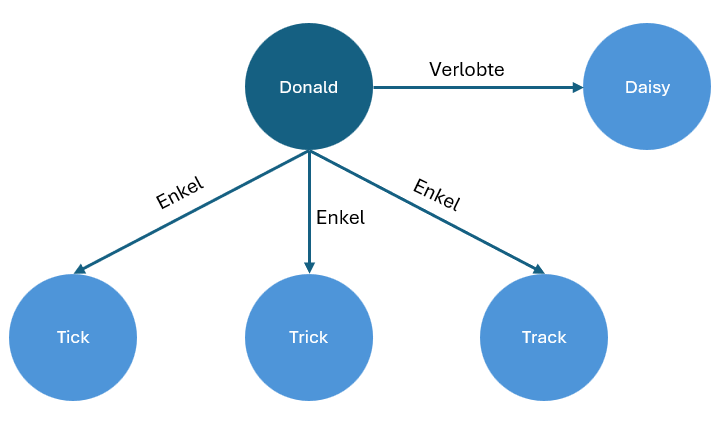

So einen wollen wir jetzt auch für Fooboars Bekannte erstellen!

Glücklicherweise stehen alle Infos im folgenden Text:

In [46]:
# Fließtext über Fooboars Bekannte
text = """Fooboars Cousine Anna war schon bei der ganzen Planung dabei und hat ihn unterstützt.
Der Nachbar Linus kennt Fooboar schon seit Fooboar klein war und war bis jetzt auf jeder Geburtstagsfeier dabei.
Grace, seine Freundin aus dem Kindergarten, und Fooboar sind bis heute befreundet.
David ist Foobars Sportsfreund, sie spielten immer zusammen Fußball und waren gemeinsam kegeln.
Der Arbeitskollege Marvin hat Fooboar immer unterstützt, sie haben gemeinsam 4 Jahre in der selben Abteilung gearbeitet.
Fernandine, seine Mutter, freut sich von sehr auf Fooboars Geburtstag und wird Kuchen mitbringen."""

### Auf geht's!🚶‍♀️‍➡️
Um den Netzwerkgraphen zu erstellen, müssen wir aus dem Fließtext Fooboars Bekannte (also die **Knoten** im Graphen) und deren Beziehung zu Fooboar (also die Verbindungen bzw. **Kanten** im Graphen) herausfiltern.

Bevor wir das tun, können wir es uns im Folgenden einfacher machen, indem wir den Fließtext erstmal in einzelne **Sätze** unterteilen.

Dazu können wir die Funktion `split()` verwenden. Englisch "to split" bedeutet ja "etwas teilen" und das macht diese Funktion auch: Sie teilt einen längeren Text in viele kürzere Textschnipsel. Wie das funktioniert, zeigt das folgende Bild:




`split()` zerlegt unseren Text also immer dann, wenn eine neue Zeile bzw. ein Absatz auftritt. Das funktioniert, weil in unserem Text jeder Satz in einer neuen Zeile steht. 

### _"Was soll dieses \n? Ist dir Fooboar über die Tastatur gelaufen?"_
Nein. Also ja, auch, aber hier ist `\n` tatsächlich ein **Sonderzeichen**. `\n` heißt soviel wie "hier soll eine neue Zeile folgen". `n` steht für "new line", also englisch für "neue Zeile". Das `\` zeigt, dass es sich um ein Sonderzeichen und nicht um den normalen Buchstaben "n" handelt. Wie ihr seht, seht ihr nichts von diesem `\n` im Text, es ist ein **unsichtbares** Zeichen (so wie Leerzeichen).

### Aufgabe

Erstelle eine Variable `sätze`, die die einzelnen Sätze des Textes enthält. Verwende dazu `split()`. Zeige dann die Sätze auf dem Bildschirm mitteln `print()` an.

*Tipp*: Für das Zeichen `\` musst du auf der Tastatur `Alt Gr` + `?` drücken.

In [ ]:
# Schreibe hier deinen Code

### Okay!👌
Jetzt können wir für jeden Satz die Person herausfiltern, die Fooboar kennt. Wir haben bereits in Aufgabe 1 Spacy genutzt, um Orte und Organisationen aus dem Text zu filtern. Jetzt wollen wir **Personen** finden.

Vervollständige den folgenden Code, sodass aus die Personen aus dem Satz zur Liste `personen` hinzugefügt werden.

*Tipp*: Brauchst du Hilfe? Schau nochmal in Aufgabe 1 nach, wie wir das mit Spacy gemacht haben. Jetzt wollen wir keine Entitäten mit "LOC" oder "ORG".

In [ ]:
# Vervollständige diesen Code

personen = []

for satz in sätze:

    satz_nlp = nlp(satz)

    for entität in satz_nlp.ents:  # wir gehen wieder über alle Entitäten eines Satzes

        if entität.label_ == ???:  # hier fehlt was
            name =  ??? # hier fehlt was
            personen.append(name)
        
        


print(personen)

### Gar nicht so schlecht!
Aber Fooboar kommt mehrmals vor. Wir wollen nur seine Bekannten in der Liste haben. Wie können wir eine Person nur zur Liste hinzufügen, wenn es nicht Fooboar selbst ist?

Das war eine rhetorische Frage. Ich sag es euch: Wir prüfen, ob der gefundene Name **nicht** "Fooboar" lautet.

Wir wollen eine gefundene Entität also nur zur Liste an Personen hinzufügen, wenn...
- es sich um eine Person handelt (`entität.label_ == "PER"`)
- es nicht Fooboar selbst ist (`entität.text != "Fooboar"` und auch `entität.text != "Fooboars"`)

Es müssen also zwei Bedingungen zutreffen. Wir können in Python auch prüfen, ob mehrere Bedingungen **alle** erfüllt sind.

`if bedingung1 and bedingung2`

Das Wort `and` zeigt, dass **beide** Bedingungen erfüllt sein müssen, nur dann wird der Code im if-Block ausgeführt.

Passen wir unseren Code also entsprechend an.

In [ ]:

personen = []

for satz in sätze:

    satz_nlp = nlp(satz)

    for entität in satz_nlp.ents:  # wir gehen wieder über alle Entitäten eines Satzes

        if entität.label_ == "PER" and entität.text != "Fooboar" and entität.text != "Fooboars":  # das ist neu
            name = entität.text
            personen.append(name)
        
        

print(personen)

### Nice!👏
Jetzt passt es! Nun können wir uns um die Beziehungen, also die Kanten des Netzwerkgraphen, kümmern.

Doch welche Arten von Beziehungen, gibt es überhaupt?

Suche aus dem Text alle Arten von Beziehungen (z.B. Freundin) heraus und füge sie in die Liste `beziehungen` ein.

### _"Halt Stopp, das ist Kinderarbeit! Wieso muss ich das machen, kann das nicht automatisch gemacht werden?"_
Harte Zeiten erfordern harte Maßnahmen. Leider können wir mit Spacy nicht nach Beziehungen suchen. Wir müssen die Dinge also dieses Mal selbst in die Hand nehmen.

In [ ]:
# Füge hier alle Arten von Beziehungen ein
beziehungen = []

### Fast geschafft!💪

Wir haben nun alles beisammen, jetzt müssen wir noch die Einzelteile zusammenfügen.

Wir wollen eine Liste aller Beziehungen (Fooboar mit einer anderen Person) anlegen. Das sind die Kanten des Graphen. Die sollen so aussehen `('Fooboar', 'Linus', {'beziehung': 'Nachbar'})`. Das bedeutet: "Fooboar hat zu Linus die Beziehung Nachbar".

Fügen wir nun alles in einem Code zusammen:

In [ ]:

kanten = []

for satz in sätze: # für jeden Satz sammeln wir die Infos und erstellen daraus eine Kante, die in der Liste 'kanten' gespeichert werden

    satz_nlp = nlp(satz)


    for entität in satz_nlp.ents:


        if entität.label_ == "PER" and entität.text != "Fooboar" and entität.text != "Fooboars":
            name = entität.text

            # das ist neu
            for beziehung in beziehungen: # wir schauen uns alle Arten von Beziehungen an...

                if beziehung in satz: # ...und prüfen, ob eine davon IN dem aktuellen Satz vorkommt und wenn ja...
                    kanten.append(("Fooboar", name, {"beziehung": beziehung})) # ...fügen wir sie der Liste hinzu
                    break # sobald eine Art von Beziehung im Satz gefunden wurde, brauchen wir uns die anderen Beziehungsarten nicht mehr anschauen
            

print(kanten)
            


### Wir sind sooo kurz davor🤏
Jetzt müssen wir nur noch diese Liste an Kanten nun an den folgenden Code geben. Dieser erstellt daraus den Netzwerkgraphen.

In [ ]:
import networkx as nx # networkx erstellt und verwaltet Netzwerkgraphen
import matplotlib.pyplot as plt # mit dieser Bibliothek zeichnen wir den Netzwerkgraph

G = nx.Graph() # hier nutzen wir die networkx Bibliothek von Oben und erstellen einen (leeren) Graphen
G.add_node("Fooboar") # in der Mitte steht Fooboar

for fooboar, andere_person, data in kanten: # wir gehen über alle Kanten...
    G.add_edge(fooboar, andere_person, label=data["beziehung"]) # ...und fügen sie dem Graphen hinzu

# hier kommt jetzt ganz viel Zeug, das z.B. die Farbe und Größe des Graphen festlegt
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1600, font_size=10) # der Graph wird hier gezeichnet (Größe, Farbe etc.)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels) # die Kanten bekommen eine Beschriftung
plt.title("Fooboars Bekannte") # die Überschirft unseres Graphen
plt.savefig("graph.png", dpi=300, bbox_inches="tight") #Graph als PNG abspeichern
plt.show() # zeigt uns den Graphen

### _"Okay cool, aber ich verstehe bei manchem nur Bahnhof"_
Das ist normal. Wie genau so ein Graph erstellt wird, welche Daten dazu benötigt werden, wie genau man die Farbe festlegt usw., das kann man sich nicht alles merken oder einfach so wissen. Programmierer schauen so etwas in einer sogenannten Dokumenation nach.

Eine Dokumentation beschreibt, wie die einzelnen Funktionen benutzt werden. Also selbst erfahrene Programmierer schauen so etwas regelmäßig nach. 

### Geschafft!👩‍💻
Das war ganz schön viel Arbeit, oder? Keine Sorge, umso mehr Übung man hat, umso leichter wird es🎓

***

## Aufgabe 3 - Zusagen & Absagen


Nachdem Fooboar mit seinen Freund:innen den perfekten Party-Ort - das Tierheim Bamberg 🐶 😺 - gefunden hat, steht nun die Frage im Raum: 
**Wer kommt eigentlich wirklich zur Party?**

Um nicht jede einzelne Nachricht nochmal öffnen und lesen zu müssen, überlegt er sich, was Zusagen und Absagen gemeinsam haben: Bestimmte Wörter! Überlege, welche Wörter Menschen meistens verwenden, wenn sie zusagen oder absagen. <br>

Falls ihr Schwierigkeiten damit habt, könnt ihr den Chatverlauf als Hilfestellung nehmen.<br>



### Chatverlauf

*Foorboar*: Hey ihr Lieben! 🥳 Es ist offiziell, nach unserem epischen Chat-Marathon über Schwimmbäder, Kletterwälder, Pferderanches, Pizzerien und lebensgefährliches Bungee Jumping 😅 haben wir endlich einen Ort gefunden. Wir feiern meinen Geburtstag im Tierheim Bamberg! 🐕🐾Wir gehen mit den Hunden spazieren, machen ein Picknick und genießen die frische Luft.
Ich freu mich total, wenn ihr dabei seid. Sagt mir bitte Bescheid, ob ihr kommen könnt! (Und keine Sorge, Grace, diesmal ist die größte Gefahr nur ein feuchter Hundekuss. 😜).


*Alan*: Hallo Foobie, ich kann leider nicht kommen 😢 – bin im Urlaub und wahrscheinlich gerade auf einem Esel in Spanien unterwegs.<br>

*Barbara*: Ja klar, ich freu mich schon total! 😍 Ich bring Hundeleckerlis mit. <br>

*Tim*: Hey Fooboar, diesmal schaffe ich’s nicht 😔 Mein Allergiespray hat schon beim Wort Tierheim Reißaus genommen. <br>

*Ada*: Natürlich bin ich dabei! 🎉 Ich backe vegane Muffins.  <br>

*John*: Hallo, muss mal schauen, weil an den Tag hat mein Hamster einen Tierarzttermin 😅. <br>

*Linus*: Servus Foo, muss auch mal schauen. Ich sage dir morgen Bescheid. <br>

*Grace*: Komme gerne, freu mich total! ❤️ Und wehe, jemand hindert mich daran, alle Hunde gleichzeitig zu streicheln!. 🐕🐕🐕 <br>



**Aufgabe 3.1: Zu und Absagen**

Schreibe passende Wörter die für Zu- und Absagen verwendet werden, jeweils in die passenden Listen ``positive_signale`` und ``negative Signale``. 

In [ ]:
# Signalwörter, die andeuten, dass jemand kommt
positive_signale = []

# Signalwörter, die andeuten, dass jemand NICHT kommt
negative_signale = []


### Idee:

Wir wollen herausfinden, ob jemand zu Fooboars Party kommt oder nicht.
Dafür soll automatisch jede Nachricht überprüft werden. In unserem Programm haben wir zwei Listen:

``positive_signale`` und ``negative_signale``. Wenn eine Nachricht ein Wort aus der positiven Liste enthält, wissen wir: Die Person sagt zu!
Wenn ein Wort aus der negativen Liste vorkommt, wissen wir: Die Person sagt ab!
Und wenn keine Wörter aus beiden Listen vorkommen, bedeutet das: Die Person hat sich noch nicht entschieden.

Bevor wir das prüfen können, müssen wir aber wissen, wer die Nachricht überhaupt geschrieben hat.
Dafür holen wir uns zuerst den Absender jeder Nachricht, also den Namen, der vor dem Doppelpunkt in einer Nachricht steht.

So wissen wir später genau, **wer** zugesagt hat und **wer** nicht.

In [27]:
def finde_absender(nachricht):
   # In jeder Nachricht steht der Name der Person vor dem Doppelpunkt.
   # Dieses Muster können wir nutzen, um den Namen (also den Absender) herauszufinden.
   teile = nachricht.split(":")  # Die Funktion split() teilt den Text am Doppelpunkt. So entsteht eine Liste mit zwei Teilen: Name und Nachricht.
   return teile[0]  # Wir geben den ersten Teil der Liste zurück, das ist der Name des Absenders.




Nachdem wir die Funktion geschrieben haben, die uns den Absender einer Nachricht herausfindet, brauchen wir jetzt noch eine weitere Funktion.
Diese Funktion soll überprüfen, ob eine Nachricht eine Zusage, eine Absage oder noch keine Entscheidung enthält.

Mit anderen Worten:
Wir wollen herausfinden, **ob jemand kommt**, **nicht kommt** oder **noch überlegt**.

In [28]:
def analysiere_antwort(nachricht: str):
   
    # Zunächst machen wir alle Buchstaben klein, damit es egal ist, ob jemand "Ja", "JA" oder "ja" schreibt.
    text = nachricht.lower()  

    # Jetzt schauen wir, ob in der Nachricht ein "positives Signalwort" steckt.
    for wort in positive_signale:  
        if wort in text:  # Wenn wir so ein Wort finden ...
            return True   # ... dann heißt das: Diese Person sagt zu.

    # Wenn kein positives Wort drin war, prüfen wir als Nächstes auf "negative Signalwörter".
    for wort in negative_signale:  
        if wort in text:  # Wenn wir so ein Wort finden ...
            return False  # ... dann heißt das: Diese Person sagt ab.

    # Wenn wir weder ein Ja-Wort noch ein Nein-Wort finden, dann wissen wir noch nicht, ob die Person kommt.
    return None  # Das bedeutet: Person hat noch nicht entschieden.


    


Als Letztes brauchen wir eine Funktion, die uns in Form von **Listen** zurückgibt,
**wer kommt**, **wer nicht kommt** und **wer sich noch nicht entschieden hat**.
Dafür ist die Funktion ``sortiere_gaeste`` zuständig.


In [29]:
def sortiere_gaeste(chatverlauf):
    zusage = []   # Hier sammeln wir alle Personen, die zugesagt haben
    absage = []   # Hier kommen alle rein, die abgesagt haben
    unklar = []   # Hier landen die, bei denen wir es noch nicht wissen
    
    # Wir gehen alle Nachrichten aus dem Chat nacheinander durch
    for nachricht in chatverlauf:
      
        absender = finde_absender(nachricht)   # Zuerst finden wir heraus, wer die Nachricht geschrieben hat

        # Dann fragen wir mit 'analysiere_antwort', ob die Person zugesagt, abgesagt oder noch nichts entschieden hat, das Ergebnis wird in die Variabel "entscheidung" gespeichert.
        entscheidung = analysiere_antwort(nachricht)

        #Als letztes überprüfen wir, welcher Wert in der Variable "entscheidung" gespeichert wurde
        if entscheidung is True: # Wenn die Person zugesagt hat, kommt ihr Name in die Zusage-Liste
            zusage.append(absender)
       
        elif entscheidung is False:  # Wenn sie abgesagt hat, kommt ihr Name in die Absage-Liste
            absage.append(absender)
    
        else: # Wenn man es noch nicht weiß, kommt ihr Name in die Unklar-Liste
            unklar.append(absender)

    return zusage, absage, unklar # Am Ende geben wir alle drei Listen zurück, damit wir wissen: Wer kommt, wer nicht kommt und wer sich noch nicht entschieden hat



Aktuell wird Fooboar auch noch als Gast gezählt, das wollen wir aber nicht, weil Fooboar selbst die Party veranstaltet. 🥳

Darum müssen wir in unserer Funktion ``sortiere_gäste`` noch überprüfen, ob der Absender einer Nachricht nicht Fooboar ist.

Nur wenn der Absender jemand anderes ist, wird die Nachricht analysiert, um herauszufinden, ob diese Person zusagt, absagt oder sich noch nicht entschieden hat.

### Jetzt seid ihr dran! 💪

Schreibt eine passende if-Bedingung und fügt sie an der richtigen Stelle in der Funktion ``sortiere_gäste`` ein.
Die Bedingung soll prüfen, ob der Absender nicht „Fooboar“ ist.
Nur wenn der Absender nicht Fooboar ist, soll die Nachricht analysiert werden und die Entscheidung (zusagen, absagen oder unklar) in die passende Liste eingetragen werden.

Wichtig: Achtet darauf, dass der Code im Rumpf der ``if-Bedingung`` richtig eingerückt steht, also eine Ebene weiter rechts!

In [ ]:
def sortiere_gäste(chatverlauf):
    zusage = []   # Hier sammeln wir alle Personen, die zugesagt haben
    absage = []   # Hier kommen alle rein, die abgesagt haben
    unklar = []   # Hier landen die, bei denen wir es noch nicht wissen
    
    # Wir gehen alle Nachrichten aus dem Chat nacheinander durch
    for nachricht in chatverlauf:
        absender = finde_absender(nachricht)   # Zuerst finden wir heraus, wer die Nachricht geschrieben hat
        

        # Danach fragen wir mit 'analysiere_antwort', ob die Person zugesagt, abgesagt oder noch nichts entschieden hat
        entscheidung = analysiere_antwort(nachricht)

        #Als letztes überprüfen wir, welcher Wert in der Variable "entscheidung" gespeichert wurde
        if entscheidung is True: # Wenn die Person zugesagt (True) hat, kommt ihr Name in die Zusage-Liste
            zusage.append(absender)
            
        elif entscheidung is False:  # Wenn sie abgesagt (False) hat, kommt ihr Name in die Absage-Liste
            absage.append(absender)
            
        else: # Wenn man es noch nicht weiß, kommt ihr Name in die Unklar-Liste
            unklar.append(absender)

    return zusage, absage, unklar # Am Ende geben wir alle drei Listen zurück, damit wir wissen: Wer kommt, wer nicht kommt und wer sich noch nicht entschieden hat



### Fast geschafft! 🥳

Nun haben wir alle wichtigen Funktionen geschrieben,
um die automatische Erkennung von Zusagen und Absagen durchführen zu können. 🎉

Im nächsten Schritt wollen wir sehen, wie das Ganze funktioniert.
Dazu sollen die folgenden Nachrichten analysiert werden:

In [ ]:
chat_einladungen = """Foorboar: Hey ihr Lieben! 🥳 Es ist offiziell, nach unserem epischen Chat-Marathon über Schwimmbäder, Kletterwälder, Pferderanches, Pizzerien und lebensgefährliches Bungee Jumping 😅 haben wir endlich einen Ort gefunden. Wir feiern meinen Geburtstag im Tierheim Bamberg! 🐕🐾Wir gehen mit den Hunden spazieren, machen ein Picknick und genießen die frische Luft. Ich freu mich total, wenn ihr dabei seid. Sagt mir bitte Bescheid, ob ihr kommen könnt! (Und keine Sorge, Grace, diesmal ist die größte Gefahr nur ein feuchter Hundekuss. 😜).
Alan: Hallo Foobie, ich kann leider nicht kommen 😢 – bin im Urlaub und wahrscheinlich gerade auf einem Esel in Spanien unterwegs.
Barbara: Ja klar, ich freu mich schon total! 😍 Ich bring Hundeleckerlis mit.
Tim: Hey Fooboar, diesmal schaffe ich’s nicht 😔 Mein Allergiespray hat schon beim Wort Tierheim Reißaus genommen. 
Ada: Natürlich bin ich dabei! 🎉 Ich backe vegane Muffins.  
John: Hallo, muss mal schauen, weil mein Hamster hat an diesen Tag einen Tierarzttermin 😅. 
Linus: Servus Foo, muss auch mal schauen. Ich sage dir morgen Bescheid. 
Grace: Komme gerne, freu mich total! ❤️ Und wehe, jemand hindert mich daran, alle Hunde gleichzeitig zu streicheln!. 🐕🐕🐕 """



Zuvor habt ihr die Methode split("\n") kennengelernt. Jetzt könnt ihr dieses Wissen gleich anwenden! 🎯

Wir nehmen den String ``chat_einladungen`` und teilen ihn mit ``split("\n")`` in einzelne Sätze auf.
So entsteht eine Liste mit allen Nachrichten aus dem Chat.


In [ ]:
#Wendet split() auf den string "chat_einladungen" an und speichert die daraus resultierende Liste in eine Variable "sätze"


Als letzten Schritt wenden wir die Funktion ``sortiere_gaeste`` auf unsere Liste ``saetze`` an und geben das Ergebnis zurück.

So sehen wir, wer zugesagt hat, wer abgesagt hat und wer sich noch nicht entschieden hat. 🎯

In [ ]:
# Wendet die Funktion "sortiere_gäste" auf die Liste "sätze" an.
# Gebt danach mit "print" aus, wer zusagt, wer absagt und wer sich noch nicht entschieden hat.
# Achtung: Die Funktion "sortiere_gäste" gibt drei Listen zurück! Deshalb brauchen wir drei Variablen, um die Ergebnisse zu speichern

### Juhu 🎉 

Nun hat Fooboar auch seine Gästelisten! 

***





## Aufgabe 4 - Geburtstagslieder

Fooboar wünscht sich zu seinem Geburtstag natürlich auch **passende Lieder**, und pragmatisch wie er ist, hat er die Dateinamen in seiner Sammlung von Liedern und Gedichten einfach durchnummeriert. Das stellt uns vor ein kleines Problem: Wie sollen wir die Geburtstagslieder finden, ohne jede Datei zu öffnen und einzeln anzuschauen?
Neben der Suche nach einzelnen Stichwörtern, die ihr schon kennengelernt habt, gibt es noch eine weitere Technik, die dabei helfen kann, große Textmengen zu analysieren: **Topic Modelling**.
Topic Modeling ist eine Methode, die dabei hilft, herauszufinden, über welche Themen in einem Dokument gesprochen wird, ohne dass man jedes Wort selbst lesen muss. 
**Wie funktioniert Topic Modeling?**
1. **Daten sammeln**: Zuerst haben wir eine große Menge an Text, wie Artikel, Bücher oder Lieder. 
2. **Wörter analysieren**: Die Software schaut sich an, welche Wörter oft zusammen vorkommen. Wenn zum Beispiel in vielen Texten die Wörter „Hund“, „Bellen“ und „Pfote“ häufig zusammen erscheinen, könnte das auf ein Thema über Hunde hindeuten. 
3. **Themen identifizieren**: Anhand der zusammenhängenden Wörter versucht die Software, verschiedene Themen zu identifizieren. Zum Beispiel könnten die Themen „Natur“, „Tiere“ oder eben „Geburtstag“ sein. 
4. **Gruppierung**: Die Software gruppiert dann die Dokumente nach diesen Themen, sodass wir sehen, welche Texte über ähnliche Dinge sprechen. Die Themen erhalten aber nicht sofort eine Überschrift: Wir müssen noch selbst erkennen, welches Thema welches ist.
**Warum ist das nützlich?** Stell dir vor, du schreibst eine große Arbeit über Tiere. Mit Topic Modeling könntest du schnell herausfinden, in welchen Texten es um einen Tiere geht, ohne jeden Text zu lesen. 

**Anwendung**
Der DARIAH Topics Explorer (https://dariah-de.github.io/TopicsExplorer/#the-application) ist eine Anwendung, die aus einer Sammlung von Textdateien (min. 5) die Topics isoliert und die Dateien so ordnet.
**1. Dateien finden** <br>
Unsere Textdateien sind bereits im Ordner Gedichte_Geburtstagslieder zusammengestellt. Sie sind im .txt-Format, das heißt, in reinen Textdateien. Wir müssen also keine weiteren Schritte unternehmen, sondern können sofort mit der Analyse starten.
Nachdem wir das Programm aufgerufen haben (DARIAH Topics Explorer.exe im Ordner Dokumente), was ein bisschen dauern kann, wählen wir unsere Dateien unter **1. Preprocessing** aus. 

 
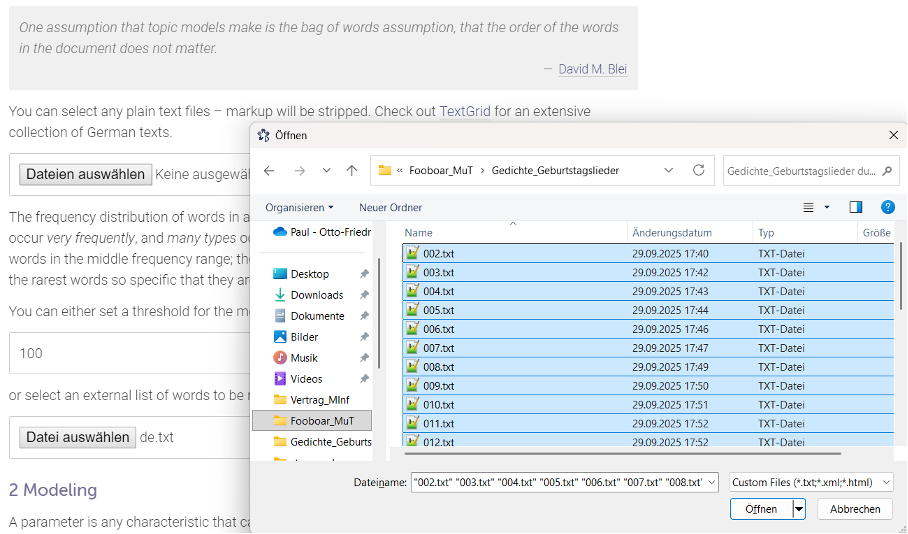

**2. Vorverarbeitung<br>**
Hier werden die Texte tokenisiert, das heißt, sie werden in einzelne Wörter geteilt, Satzzeichen werden entfernt und Groß- und Kleinschreibung angeglichen. „Das“ und „das“ werden also dasselbe Wort, „Floh“ und „floh“ aber auch. Weil in den meisten Texten einige wenige Wörter sehr häufig vorkommen (Zipfsches Gesetz), aber gleichzeitig Wörter wie _und_, _es_, _die_, vor nur sehr wenig über den Text aussagen, werden die sogenannten _Stopwords_ entfernt. Hier haben wir die Wahl, entweder die 100 (oder mehr oder weniger) häufigsten Wörter aus den Texten zu entfernen, oder eine Stopword-Liste zu verwenden. Weil eine Liste von Stopwords verhindert, dass versehentlich auch wichtige Wörter entfernt werden und weil mit DARIAH auch einige Stopwordlisten für verbreitete Sprachen mitgeliefert werden, wählen wir unten statt einer _Threshold_ unter _select an external list of words to be removed_ die Datei "\sample-corpus\de.txt" aus, die ihr im Ordner Dokumente findet. Sie enthält eine Liste der häufigsten Wörter im Deutschen.

<br>


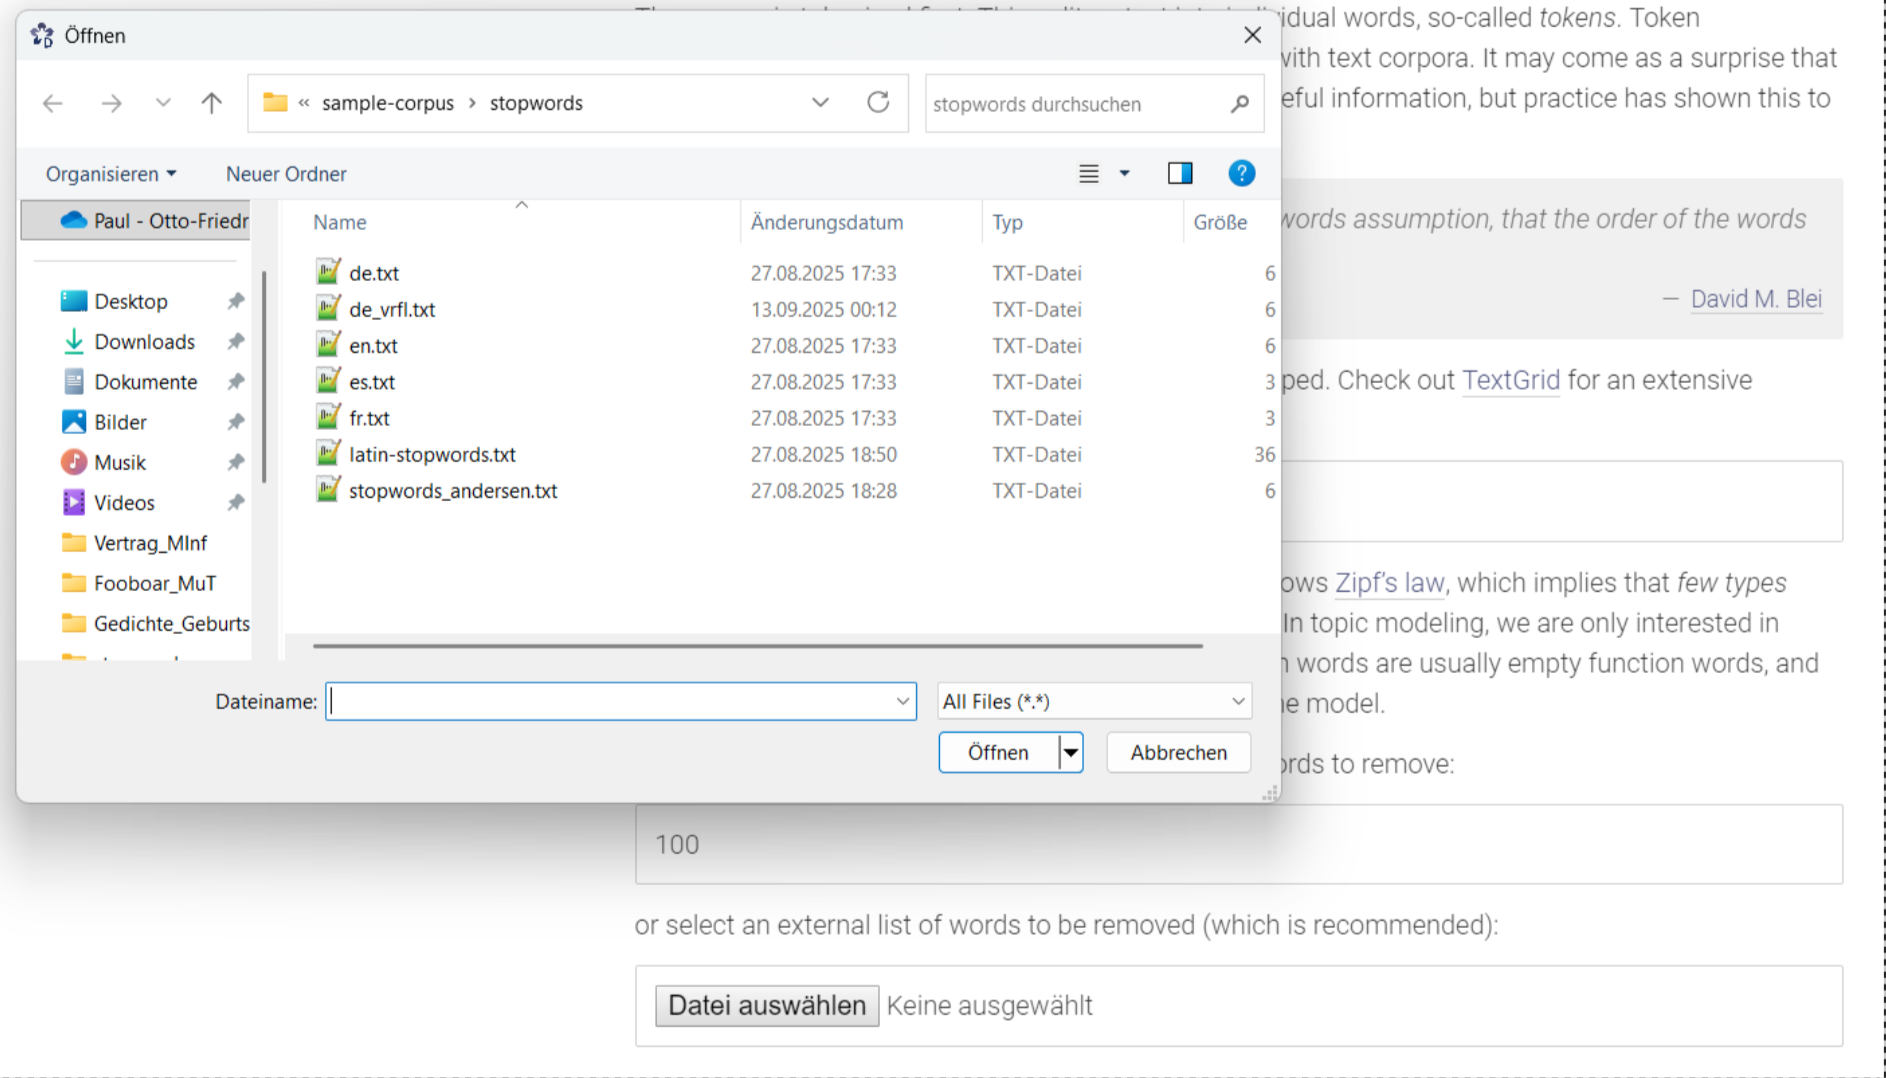

**3. Modell einstellen <br>**
Unter **2. Modeling** passen wir die Parameter an. Als Anzahl von Topics reicht für unsere überschaubare Textsammlung 6, da es nur wenige Texte sind, können wir aber auch problemlos 1000 Wiederholungen auswählen. Nun klicken wir unter **3. Visualizing** auf _Train Topic Model_.

**4. Ergebnis auswerten <br>**
Nach ca. 30 Sekunden Rechenzeit gelangen wir auf eine Übersichtsseite auf der sechs Balken mit den Wörtern, die die jeweiligen Topics am meisten prägen. In welchen Topics sind Wörter zum Thema „Geburtstag“ zu erkennen?

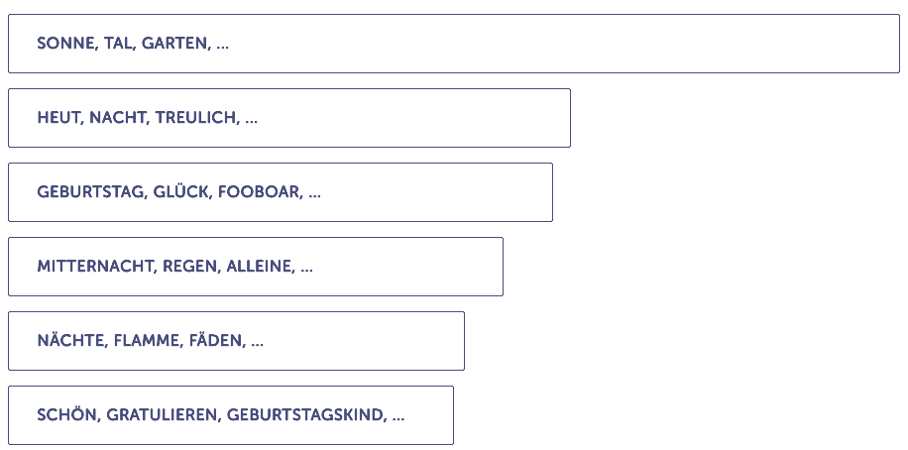

Klicke unter _Menu_ auf _Document-Topic-Distribution_: Vergleiche die blauen Kästchen, die die Übereinstimmung mit dem Topic der Spalte anzeigen, des Dokuments „Zum_Geburtstag_viel_Glück.txt“ mit denen der nummerierten Dokumente. <br>
Aufgaben: 
**Welche Dokumente sind dem bekannten Geburtstagslied am ähnlichsten? Öffne stichprobenartig einige davon. Handelt es sich um Geburtstagslieder?**


**Welche Themen könnten die anderen Lieder/Gedichte haben? Was suggerieren die Themenvorschläge?**

